In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2022-06-23 11:31:17.000219: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-23 11:31:17.089427: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 11:31:17.089455: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Load the data

In [2]:
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Data Attributes

In [3]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
         'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
X_train.dtype, X_test.dtype

(dtype('uint8'), dtype('uint8'))

In [8]:
y_train.dtype, y_test.dtype

(dtype('uint8'), dtype('uint8'))

## Display images

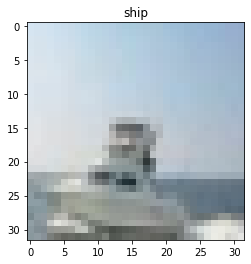

In [9]:
plt.imshow(X_train[100])
plt.title(labels[y_train[100][0]])
plt.show()

## Change the datatype of X

In [10]:
X_train = tf.cast(X_train, tf.float32)
X_test = tf.cast(X_test, tf.float32)

2022-06-23 11:31:24.808965: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-23 11:31:24.809008: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-23 11:31:24.809036: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (SOUPARNIKA): /proc/driver/nvidia/version does not exist
2022-06-23 11:31:24.811454: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
X_train.dtype, X_test.dtype

(tf.float32, tf.float32)

## Reshape y to vector

In [12]:
y_train = y_train.reshape(-1,)

y_test = y_test.reshape(-1, )

In [13]:
y_train.shape, y_test.shape

((50000,), (10000,))

## Data Normalization

In [14]:
X_train = X_train/255.0

X_test = X_test/255.0

## One hot encoding of target variable

In [15]:
y_train[100]

8

In [16]:
y_train = tf.keras.utils.to_categorical(y_train)

y_test = tf.keras.utils.to_categorical(y_test)

In [17]:
y_train[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

## Data augmentation

In [18]:
data_augmentation = tf.keras.models.Sequential()

data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomFlip(
                        'horizontal',
                        input_shape=(32, 32, 3)
                        ))

data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))

data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomZoom(0.1))

## Build the Model

In [19]:
def build_dcnn():
    '''
    Deep Convolutional Neural Network
    '''
    dcnn_model = tf.keras.models.Sequential()
    
    dcnn_model.add(tf.keras.layers.Input(shape=(32, 32, 3)))
    
    dcnn_model.add(tf.keras.layers.Convolution2D(filters=32, 
                                                 kernel_size=(3, 3), 
                                                activation='relu'))
    dcnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), 
                                                strides=(1, 1)))
    
    dcnn_model.add(tf.keras.layers.Flatten())
    
    dcnn_model.add(tf.keras.layers.Dense(units=512, activation='relu'))
    
    dcnn_model.add(tf.keras.layers.Dropout(0.5))
    
    dcnn_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    
    return dcnn_model

In [20]:
def build_dcnn_perform_improve():
    '''
    Performance Improvement with a deeper network and regularization
    '''
    dcnn_model = tf.keras.models.Sequential()
    
    dcnn_model.add(tf.keras.layers.Input(shape=(32, 32, 3)))
    
    #dcnn_model.add(data_augmentation) # Data Augmentation
    
    #Deeper Convolution Neural Network CONV + CONV + MAXPOOL + DROPOUT
    dcnn_model.add(tf.keras.layers.Convolution2D(filters=32, 
                                                 kernel_size=(3, 3),
                                                padding='same',
                                                 activation='relu'))
    
    dcnn_model.add(tf.keras.layers.Convolution2D(filters=32, 
                                                 kernel_size=(3, 3),
                                                padding='same', 
                                                 activation='relu'))
    
    dcnn_model.add(tf.keras.layers.BatchNormalization()) # regularization
        
    dcnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    dcnn_model.add(tf.keras.layers.Dropout(0.2))
    
    ###
    dcnn_model.add(tf.keras.layers.Convolution2D(filters=64, 
                                                 kernel_size=(3, 3),
                                                padding='same', 
                                                 activation='relu'))
    
    dcnn_model.add(tf.keras.layers.Convolution2D(filters=64, 
                                                 kernel_size=(3, 3),
                                                padding='same', 
                                                 activation='relu'))
    
    dcnn_model.add(tf.keras.layers.BatchNormalization()) # regularization
        
    dcnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    dcnn_model.add(tf.keras.layers.Dropout(0.3))
    
    ###
    dcnn_model.add(tf.keras.layers.Convolution2D(filters=128, 
                                                 kernel_size=(3, 3),
                                                padding='same', 
                                                 activation='relu'))
    
    dcnn_model.add(tf.keras.layers.Convolution2D(filters=128, 
                                                 kernel_size=(3, 3),
                                                padding='same', 
                                                 activation='relu'))
    
    dcnn_model.add(tf.keras.layers.BatchNormalization()) # regularization
    
    dcnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    dcnn_model.add(tf.keras.layers.Dropout(0.4))   
    
    ###
    dcnn_model.add(tf.keras.layers.Flatten())
       
    dcnn_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    
    return dcnn_model

## Compile the Model

In [21]:
model = build_dcnn_perform_improve()

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

## Train the model

In [22]:
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='./logs/cifar10/aug',
                                            histogram_freq=1)

#model.fit(X_train, y_train, epochs=20, callbacks=tb_callback)

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 75s 47ms/step - loss: 1.7819 - accuracy: 0.4569
Epoch 2/50
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0995 - accuracy: 0.6292
Epoch 3/50
1032/1563 [==================>...........] - ETA: 24s - loss: 0.8811 - accuracy: 0.6969

KeyboardInterrupt: 

## Model Summary

In [ ]:
model.summary()

## Model Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy:', test_accuracy)

## Prediction

In [ ]:
y_predict = [tf.argmax(i) for i in model.predict(X_test)]

In [ ]:
list(y_test[500]).index(1), y_predict[500]

## TensorBoard

In [ ]:
%load_ext tensorboard

%tensorboard --logdir logs/cifar10

## Save the model to disk

In [ ]:
model_json = model.to_json()

with open('cifar10_model.json', 'w') as json_file:
    json_file.write(model_json)
    
model.save_weights('cifar10_weights.h5')

## Predicting with saved model and weights

In [ ]:
from skimage.transform import resize
from skimage.color import rgb2gray
from imageio import imread
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

model = model_from_json(open('cifar10_model.json').read())

model.load_weights('cifar10_weights.h5')

In [ ]:
image_names = ['Cat.jpeg', 'Dog.jpeg']

In [ ]:
imread('Cat.jpeg').shape

In [ ]:
imread('Cat.jpeg')

In [ ]:
images = [resize((imread(img)), (32, 32, 3)).astype('float32') 
          for img in image_names]

np.array(images).shape

In [ ]:
images = np.array(images) / 255.0

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(),
             loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [ ]:
predictions = model.predict(images)

In [ ]:
[labels[i] for i in np.argmax(predictions, axis=1)]